<a href="https://colab.research.google.com/github/sharique2903/-LGMVIP-DataScience-TaskNumber/blob/main/Task_2_(Neural_Network_that_read_Handwritting_using_Tensorflow_and_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Load And Processes the Dataset**

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Normalize pixel values to be between 0 and 1**

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Build the CNN model**

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

**Compile the Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

In [ ]:
model.fit(train_images[..., np.newaxis], train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1551 - accuracy: 0.9534
Epoch 2/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0532 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0155 - accuracy: 0.9949


**Evaluate the model on the test set**

In [ ]:
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0456 - accuracy: 0.9854
Test accuracy: 0.9854000210762024


**Make Predictions**

In [ ]:
predictions = model.predict(test_images[..., np.newaxis])

313/313 [==============================] - 1s 4ms/step


**Visualize the Result**

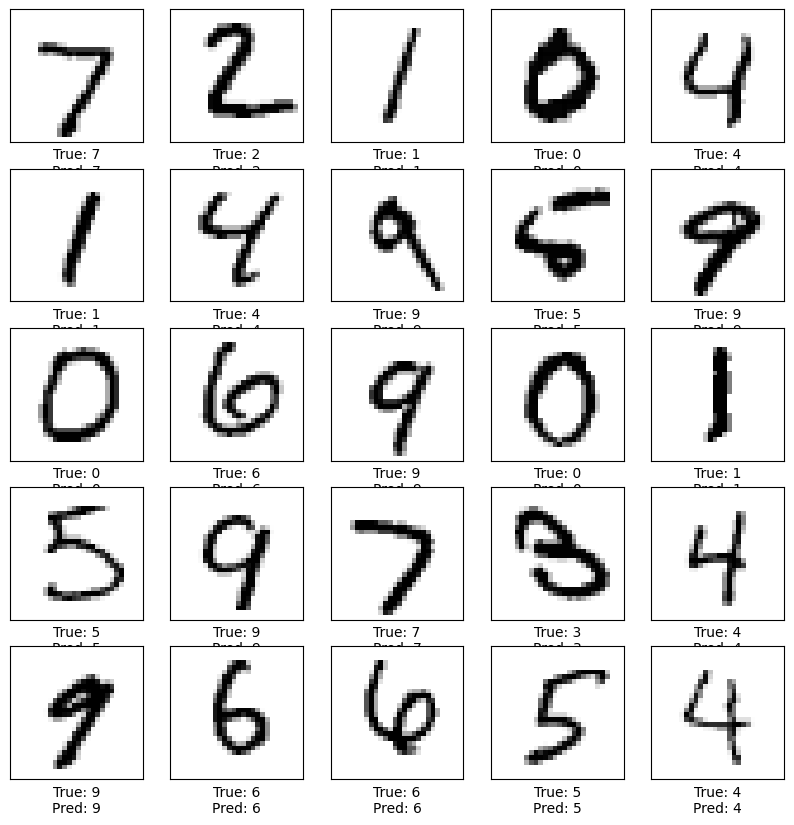

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {test_labels[i]}\nPred: {np.argmax(predictions[i])}")
plt.show()
